In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/My\ Drive/cards.zip -d /content/cards_data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/cards_data/cards/train/queen of spades/066.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/099.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/106.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/112.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/104.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/110.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/138.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/070.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/064.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/058.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/059.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/065.jpg  
  inflating: /content/cards_data/cards/train/queen of spades/071.jpg  
  inflating: /content/card

In [3]:
!ls /content/cards_data/

cards


In [6]:
!ls /content/cards_data/cards/train/

'ace of clubs'	     'four of diamonds'  'nine of hearts'     'six of spades'
'ace of diamonds'    'four of hearts'	 'nine of spades'     'ten of clubs'
'ace of hearts'      'four of spades'	 'queen of clubs'     'ten of diamonds'
'ace of spades'      'jack of clubs'	 'queen of diamonds'  'ten of hearts'
'eight of clubs'     'jack of diamonds'  'queen of hearts'    'ten of spades'
'eight of diamonds'  'jack of hearts'	 'queen of spades'    'three of clubs'
'eight of hearts'    'jack of spades'	 'seven of clubs'     'three of diamonds'
'eight of spades'    'king of clubs'	 'seven of diamonds'  'three of hearts'
'five of clubs'      'king of diamonds'  'seven of hearts'    'three of spades'
'five of diamonds'   'king of hearts'	 'seven of spades'    'two of clubs'
'five of hearts'     'king of spades'	 'six of clubs'       'two of diamonds'
'five of spades'     'nine of clubs'	 'six of diamonds'    'two of hearts'
'four of clubs'      'nine of diamonds'  'six of hearts'      'two of spade

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [10]:
train_dir = "/content/cards_data/cards/train/"
test_dir = "/content/cards_data/cards/test/"
valid_dir = "/content/cards_data/cards/valid/"

In [11]:
!ls /content/cards_data/cards/train/
!ls /content/cards_data/cards/test/
!ls /content/cards_data/cards/valid/

'ace of clubs'	     'four of diamonds'  'nine of hearts'     'six of spades'
'ace of diamonds'    'four of hearts'	 'nine of spades'     'ten of clubs'
'ace of hearts'      'four of spades'	 'queen of clubs'     'ten of diamonds'
'ace of spades'      'jack of clubs'	 'queen of diamonds'  'ten of hearts'
'eight of clubs'     'jack of diamonds'  'queen of hearts'    'ten of spades'
'eight of diamonds'  'jack of hearts'	 'queen of spades'    'three of clubs'
'eight of hearts'    'jack of spades'	 'seven of clubs'     'three of diamonds'
'eight of spades'    'king of clubs'	 'seven of diamonds'  'three of hearts'
'five of clubs'      'king of diamonds'  'seven of hearts'    'three of spades'
'five of diamonds'   'king of hearts'	 'seven of spades'    'two of clubs'
'five of hearts'     'king of spades'	 'six of clubs'       'two of diamonds'
'five of spades'     'nine of clubs'	 'six of diamonds'    'two of hearts'
'four of clubs'      'nine of diamonds'  'six of hearts'      'two of spade

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [14]:
# Image size (resize all images to this size)
img_size = (150, 150)

# Rescale pixel values to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 7509 images belonging to 52 classes.
Found 260 images belonging to 52 classes.
Found 260 images belonging to 52 classes.


In [15]:
# Define the model architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output of convolutional layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(512, activation='relu'),

    # Output layer
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 61s 227ms/step - accuracy: 0.1237 - loss: 3.6266 - val_accuracy: 0.4727 - val_loss: 1.7029
Epoch 2/10
  1/234 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5000 - loss: 2.6485

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5000 - loss: 2.6485 - val_accuracy: 0.7500 - val_loss: 2.9067
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 67s 197ms/step - accuracy: 0.4826 - loss: 1.9083 - val_accuracy: 0.6797 - val_loss: 1.1383
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 1.3359 - val_accuracy: 1.0000 - val_loss: 0.1347
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 45s 190ms/step - accuracy: 0.6121 - loss: 1.4506 - val_accuracy: 0.7500 - val_loss: 0.9293
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.7500 - loss: 0.9801 - val_accuracy: 1.0000 - val_loss: 0.4216
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 46s 190ms/step - accuracy: 0.6799 - loss: 1.1802 - val_accuracy: 0.7734 - val_loss: 0.8711
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.6571 - val_accuracy: 0.7500 - val_loss: 0.8360
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 47s 194ms/step - accuracy: 0.7314 - loss: 0.9814 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7267 - loss: 0.9830
Test Accuracy: 0.7305


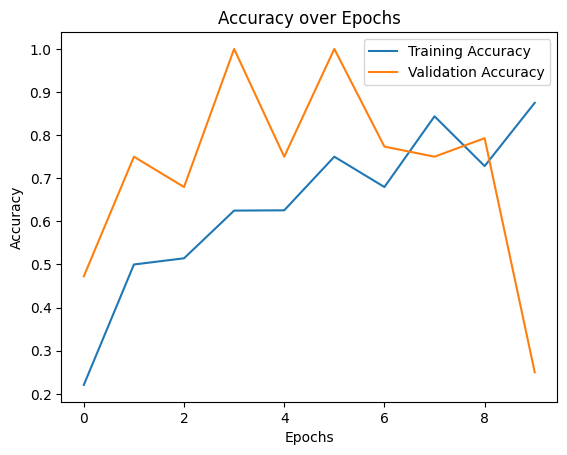

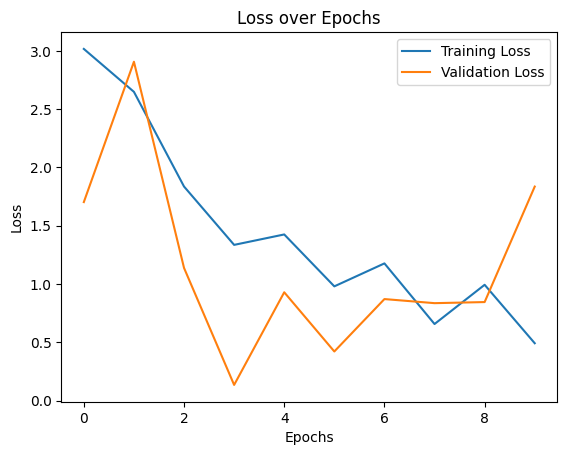

In [18]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [20]:
model.add(layers.Dropout(0.5))  # Add dropout with a 50% rate